In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
#import missingno as msno
from scipy import stats

import numpy as np
import datetime
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import precision_score
from sklearn.metrics import precision_score

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score



# Import recall_score
from sklearn.metrics import recall_score

#from sklearn.metrics import roc_auc_curve
# Import roc_curve
from sklearn.metrics import roc_curve



from sklearn.svm import SVC

# Import confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus



# Import train_test_split
from sklearn.model_selection import train_test_split

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression


from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



import scipy.stats as st
#import pandas_profiling
import requests 
%matplotlib inline


In [2]:
# Semester Start Date:
StartDate = '2018-09-17' 
StartDate = pd.to_datetime(StartDate)


In [3]:
# Semester End Date:
EndDate = '2019-01-21' 
EndDate = pd.to_datetime(EndDate)

In [4]:
TriOne = '2018-10-22'
TriOne = pd.to_datetime(TriOne)

In [5]:
TriTwo = '2018-11-26'
TriTwo = pd.to_datetime(TriTwo)

In [6]:
# Begin6 START OF MODULE 6
# It is unknown what year this module is from.20 student passed this module and 8 failed.Module 6 has labs,
# lecture and continuous assessment.The assessments are worth 35/45 and 20 percent each.The class size is (<30)
#
#
# This Module has 3 files
# Continuos assesemetn Week on week
# Total CA Mark is the total we are working off

In [7]:
# Data Preperation Module 6
# 3 Files with this module
# Module 6
module6ml = pd.read_csv('Module6-MoodleLogs.csv')

In [8]:
module6mg = pd.read_csv('Module6-MoodleGrades.csv')

In [9]:
module6og = pd.read_csv('Module6-OwnGrades.csv')

In [10]:
print (module6mg.columns.tolist())


['First name', 'Surname', 'ID number', 'Email address', 'Quiz: CA1 - Theory Test (Real)', 'Last downloaded from this course']


In [11]:
print (module6og.columns.tolist())
# Print Columns

['ID number', 'First Name', 'Surname', 'Group', 'Total CA Mark / 100', 'Final Grade', 'CA1 Theory Test / 35', 'CA2 Lab Test / 45', 'Labs CA / 20', 'Wk1-Lecture', 'Wk1-Lab', 'Wk2-Lecture', 'Wk2-Lab', 'Wk2-CA / 3', 'wk2-CA / 2.5', 'Wk3-Lecture', 'Wk3-Lab', 'wk3-CA / 3', 'wk3-Ca/2.5', 'Wk4-Lecture', 'Wk4-Lab', 'wk4-CA/2.5', 'wk4-ca/3', 'Wk5-Lecture', 'Wk5-Lab', 'wk5-Ca/2.5', 'wk5-CA / 3', 'Wk6-Lecture', 'Wk6-Lab', 'wk6-CA/2.5', 'wk6-CA / 3', 'wk7-Lecture', 'wk7-Lab', 'wk7-CA / 3', 'wk7-CA / 2.5', 'Wk8-Lecture', 'Wk8-CA1', 'Wk9-Lecture', 'Wk9-Lab', 'Wk9-CA / 3', 'wk10-Lecture', 'wk10-Lab', 'wk10-CA / 2.5', 'wk10-CA / 3', 'wl11-Lecture', 'wk11-CA2', 'Student Name', 'wk0-CA / 2.5']


In [12]:
# Print the number of unique values in each modul6ml column
print(module6ml.nunique())

Time              2728
User full name      27
Affected user        1
Event context       46
Component           10
Event name          27
Description         42
Origin               2
A                    1
dtype: int64


In [13]:
# Print the number of unique values in each modul6og column
print(module6og.nunique())

ID number               28
First Name              28
Surname                 28
Group                    2
Total CA Mark / 100     28
Final Grade              6
CA1 Theory Test / 35    25
CA2 Lab Test / 45       20
Labs CA / 20            17
Wk1-Lecture              2
Wk1-Lab                  2
Wk2-Lecture              2
Wk2-Lab                  2
Wk2-CA / 3               4
wk2-CA / 2.5             4
Wk3-Lecture              2
Wk3-Lab                  2
wk3-CA / 3               3
wk3-Ca/2.5               3
Wk4-Lecture              2
Wk4-Lab                  2
wk4-CA/2.5               4
wk4-ca/3                 4
Wk5-Lecture              2
Wk5-Lab                  2
wk5-Ca/2.5               4
wk5-CA / 3               4
Wk6-Lecture              2
Wk6-Lab                  2
wk6-CA/2.5               3
wk6-CA / 3               3
wk7-Lecture              2
wk7-Lab                  2
wk7-CA / 3               3
wk7-CA / 2.5             3
Wk8-Lecture              2
Wk8-CA1                  2
W

In [14]:
# Print the number of unique values in each modul6mg column
print(module6mg.nunique())

First name                          28
Surname                             28
ID number                           28
Email address                       28
Quiz: CA1 - Theory Test (Real)      25
Last downloaded from this course     1
dtype: int64


In [15]:
# Time6
time6 = module6ml["Time"].str.split(",", n = 1, expand = True)

In [16]:
# making separate Date column from new data frame 
module6ml["Date"]= time6[0] 

# making seperate Time column from new data frame
module6ml['Time']= time6[1]


In [17]:
# Convert the date column to datetime64
module6ml.Date = pd.to_datetime(module6ml.Date)

In [18]:
len(module6ml)

5505

In [19]:
#Remove activity outside semester start and end dates range -Timeedit6
mask6 = (module6ml['Date'] >= StartDate) & (module6ml['Date'] <= EndDate)

module6ml = module6ml.loc[mask6]

len(module6ml)

4408

In [20]:
#Remove activity outside semester start and end dates range -Timeedit1
week5_6 = (module6ml['Date'] >= StartDate) & (module6ml['Date'] <= TriOne)

FirstFive6 = module6ml.loc[week5_6]

len(FirstFive6)


805

In [21]:
#Remove activity outside semester start and end dates range -Timeedit1
week10_6 = (module6ml['Date'] >= TriOne) & (module6ml['Date'] <= TriTwo)

FirstTen6 = module6ml.loc[week10_6]

len(FirstTen6)


2429

In [22]:

#Remove activity outside semester start and end dates range -Timeedit1
week15_6 = (module6ml['Date'] >= TriTwo) & (module6ml['Date'] <= EndDate)

FirstFivt6 = module6ml.loc[week15_6]

len(FirstFivt6)


1196

In [23]:
#Split string User full name which adds two new columns
# new data frame with split value columns 
new6 = module6ml["User full name"].str.split(" ", n = 1, expand = True)


In [24]:
# making separate first name column from new data frame 
module6ml["First name"]= new6[0] 

# making separate last name column from new data frame 
module6ml["Last name"]= new6[1] 


In [26]:
module6ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,A,Date,First name,Last name
41,22:03,afDK bEXb,-,File: Lecture 11 - b a Small N,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2019-01-21,afDK,bEXb
42,22:03,afDK bEXb,-,File: Lecture 10 - t and a l,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2019-01-21,afDK,bEXb


In [27]:
module6ml.dtypes

Time                      object
User full name            object
Affected user             object
Event context             object
Component                 object
Event name                object
Description               object
Origin                    object
A                         object
Date              datetime64[ns]
First name                object
Last name                 object
dtype: object

In [28]:
module6ml.head(2)

,Time,User full name,Affected user,Event context,Component,Event name,Description,Origin,A,Date,First name,Last name
41,22:03,afDK bEXb,-,File: Lecture 11 - b a Small N,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2019-01-21,afDK,bEXb
42,22:03,afDK bEXb,-,File: Lecture 10 - t and a l,File,Course module viewed,The user with id '0' viewed the 'resource' act...,web,127.0.0.1,2019-01-21,afDK,bEXb


In [29]:
#Columndrop6
module6ml = module6ml.drop(module6ml[['A','Origin','Description','Affected user']], axis=1)

In [30]:
module6ml.head(2)

,Time,User full name,Event context,Component,Event name,Date,First name,Last name
41,22:03,afDK bEXb,File: Lecture 11 - b a Small N,File,Course module viewed,2019-01-21,afDK,bEXb
42,22:03,afDK bEXb,File: Lecture 10 - t and a l,File,Course module viewed,2019-01-21,afDK,bEXb


In [31]:
module6ml_onehot = module6ml.copy()
module6ml_onehot = pd.get_dummies(module6ml_onehot, columns=['Event name'], prefix = ['Event name'])
module6ml_onehot = pd.get_dummies(module6ml_onehot, columns=['Event context'], prefix = ['Event context'])
module6ml_onehot = pd.get_dummies(module6ml_onehot, columns=['Component'], prefix = ['Component'])


print(module6ml_onehot.head())


      Time User full name       Date First name Last name  \
41   22:03      afDK bEXb 2019-01-21       afDK      bEXb   
42   22:03      afDK bEXb 2019-01-21       afDK      bEXb   
43   22:02      afDK bEXb 2019-01-21       afDK      bEXb   
44   22:02      afDK bEXb 2019-01-21       afDK      bEXb   
45   22:02      afDK bEXb 2019-01-21       afDK      bEXb   

    Event name_A file has been uploaded.  \
41                                     0   
42                                     0   
43                                     0   
44                                     0   
45                                     0   

    Event name_A submission has been submitted.  \
41                                            0   
42                                            0   
43                                            0   
44                                            0   
45                                            0   

    Event name_Badge listing viewed  Event name_Comment creat

In [32]:
module6ml_onehot.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Comment created,Event name_Course activity completion updated,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_Submission comments,Component_System,Component_URL,Component_User report
41,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [33]:
len(module6ml_onehot)

4408

In [34]:
#Cleanup6
# Need to put module6ml logs - add engaged field
#

In [39]:
module6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,Student Name,wk0-CA / 2.5
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,Y,...,N,0,N,N,0.0,0,N,Y,--,0.000000
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,Y,...,Y,2,N,Y,2.5,3,N,Y,--,1.666667


In [36]:
m6og = module6og[['ID number', 'First Name', 'Surname', 'Group', 'Total CA Mark / 100', 'Final Grade', 'CA1 Theory Test / 35', 'CA2 Lab Test / 45', 'Labs CA / 20', 'Wk1-Lecture', 'Wk1-Lab', 'Wk2-Lecture', 'Wk2-Lab', 'Wk2-CA / 3', 'wk2-CA / 2.5', 'Wk3-Lecture', 'Wk3-Lab', 'wk3-CA / 3', 'wk3-Ca/2.5', 'Wk4-Lecture', 'Wk4-Lab', 'wk4-CA/2.5', 'wk4-ca/3', 'Wk5-Lecture', 'Wk5-Lab', 'wk5-Ca/2.5', 'wk5-CA / 3', 'Wk6-Lecture', 'Wk6-Lab', 'wk6-CA/2.5', 'wk6-CA / 3', 'wk7-Lecture', 'wk7-Lab', 'wk7-CA / 3', 'wk7-CA / 2.5', 'Wk8-Lecture', 'Wk8-CA1', 'Wk9-Lecture', 'Wk9-Lab', 'Wk9-CA / 3', 'wk10-Lecture', 'wk10-Lab', 'wk10-CA / 2.5', 'wk10-CA / 3', 'wl11-Lecture', 'wk11-CA2', 'wk0-CA / 2.5']]

In [37]:
m6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lecture,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,Y,...,Y,N,0,N,N,0.0,0,N,Y,0.000000
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,Y,...,Y,Y,2,N,Y,2.5,3,N,Y,1.666667


In [38]:
# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 6

m6og['Wk1-Lecture'] = m6og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Print the results to verify
print(m6og['Wk1-Lecture'].head())


0    1
1    1
2    1
3    1
4    1
Name: Wk1-Lecture, dtype: int64


In [77]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wl11-Lecture'  in Module 6

m6og['wk11-CA2'] = m6og['wk11-CA2'].replace({'N': 0 , 'Y': 1})

In [78]:
# Print the results to verify
print(m6og['wk11-CA2'].head())

0    1
1    1
2    0
3    1
4    1
Name: wk11-CA2, dtype: int64


In [79]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wl11-Lecture'  in Module 6

m6og['wl11-Lecture'] = m6og['wl11-Lecture'].replace({'N': 0 , 'Y': 1})

In [80]:
# Print the results to verify
print(m6og['wl11-Lecture'].head())

0    0
1    0
2    0
3    0
4    1
Name: wl11-Lecture, dtype: int64


In [81]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lab'  in Module 6

m6og['wk10-Lab'] = m6og['wk10-Lab'].replace({'N': 0 , 'Y': 1})

In [82]:
# Print the results to verify
print(m6og['wk10-Lab'].head())

0    0
1    1
2    0
3    1
4    1
Name: wk10-Lab, dtype: int64


In [83]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lab'  in Module 6

m6og['Wk9-Lab'] = m6og['Wk9-Lab'].replace({'N': 0 , 'Y': 1})

In [84]:
# Print the results to verify
print(m6og['Wk9-Lab'].head())

0    0
1    1
2    0
3    1
4    1
Name: Wk9-Lab, dtype: int64


In [85]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk10-Lecture'  in Module 6

m6og['wk10-Lecture'] = m6og['wk10-Lecture'].replace({'N': 0 , 'Y': 1})

In [86]:
# Print the results to verify
print(m6og['wk10-Lecture'].head())

0    0
1    0
2    0
3    1
4    0
Name: wk10-Lecture, dtype: int64


In [87]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk9-Lecture'  in Module 6

m6og['Wk9-Lecture'] = m6og['Wk9-Lecture'].replace({'N': 0 , 'Y': 1})

In [88]:
# Print the results to verify
print(m6og['Wk9-Lecture'].head())

0    1
1    1
2    0
3    1
4    1
Name: Wk9-Lecture, dtype: int64


In [90]:

# Replace 'no' with 0 and 'yes' with 1 in 'Wk1-Lecture'  in Module 6

#m6og['Wk1-Lecture'] = m6og['Wk1-Lecture'].replace({'N': 0 , 'Y': 1})

In [95]:
m6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged,Engaged,Engaged Students Module 6
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0.0,0,0,1,0.000000,0,False,False
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,0,1,2.5,3,0,1,1.666667,1,True,True


In [92]:
m6og.drop(m6og[['Engaged','Engaged Students Module 6']], axis=1)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0,0,0.000000,0,0,1,0.000000,0
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,1,2,0,1,2.500000,3,0,1,1.666667,1
2,sD2nqfdF,aD2n,bqfd,2,6.666667,F,0.00,0.00,6.666667,1,...,0,0,0,0,0.000000,0,0,0,0.000000,0
3,FjdRQnjO,ajdR,bQnj,2,40.516667,C,15.35,13.50,11.666667,1,...,1,1,1,1,1.666667,2,0,1,0.833333,0
4,tAK5SAbE,aAK5,bSAb,2,69.883333,B+,22.50,31.05,15.833333,1,...,1,2,0,1,2.500000,3,1,1,1.666667,1
5,ba14Mdv9,aa14,bMdv,1,5.000000,F,0.00,0.00,5.000000,0,...,0,0,0,0,0.000000,0,0,0,0.000000,0
6,jHCLSn1y,aHCL,bSn1,2,94.036667,A,29.87,45.00,19.166667,1,...,1,3,1,1,1.666667,2,1,1,2.500000,1
7,qjrVTesk,ajrV,bTes,1,64.306667,B,13.89,33.75,16.666667,1,...,1,2,1,1,2.500000,3,1,1,1.666667,1
8,qfDKEXbx,afDK,bEXb,2,75.596667,B+,22.68,33.75,19.166667,1,...,1,2,1,1,2.500000,3,1,1,1.666667,1
9,LTcug6b4,aTcu,bg6b,1,67.586667,B,21.92,31.50,14.166667,1,...,1,2,0,1,1.666667,2,0,1,1.666667,1


In [94]:
m6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged,Engaged,Engaged Students Module 6
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0.0,0,0,1,0.000000,0,False,False
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,0,1,2.5,3,0,1,1.666667,1,True,True


In [43]:
m6og_subset = m6og

In [99]:
m6og_subset.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged,Engaged,Engaged Students Module 6
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0.0,0,0,1,0.000000,0,False,False
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,0,1,2.5,3,0,1,1.666667,1,True,True


In [100]:
#Columndrop6
m6og_subset = m6og_subset.drop(m6og_subset[['Engaged','Engaged Students Module 6']], axis=1)

In [101]:
m6og_subset.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0,0,0.0,0,0,1,0.000000,0
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,1,2,0,1,2.5,3,0,1,1.666667,1


In [46]:
len(m6og_subset)

28

In [103]:
m6og_subset_tidy = m6og_subset.rename(columns = {'First Name': 'First name',}, inplace = False)

In [104]:
m6og_subset_tidy.head(2)

,ID number,First name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,0,0,0,0,0.0,0,0,1,0.000000,0
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,1,2,0,1,2.5,3,0,1,1.666667,1


In [49]:
#Columns6 cleanup


In [50]:
module6mg.head(2)

,First name,Surname,ID number,Email address,Quiz: CA1 - Theory Test (Real),Last downloaded from this course
0,a8NM,bDqB,U8NMDqBG,U8NMDqBG@student.itb.ie,0.0,1553878127
1,aSnR,bGk9,VSnRGk9O,VSnRGk9O@student.itb.ie,0.0,1553878127


In [51]:
m6mg = module6mg[['First name', 'Surname', 'ID number', 'Quiz: CA1 - Theory Test (Real)']]

In [52]:
m6mg_subset = m6mg

In [53]:
m6ml = module6ml[[ 'Date','Time', 'User full name','Event context','Component','Event name',]]


In [54]:
m6ml.head(2)

,Date,Time,User full name,Event context,Component,Event name
41,2019-01-21,22:03,afDK bEXb,File: Lecture 11 - b a Small N,File,Course module viewed
42,2019-01-21,22:03,afDK bEXb,File: Lecture 10 - t and a l,File,Course module viewed


In [55]:
m6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lecture,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,Y,N,0,N,N,0.0,0,N,Y,0.000000
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,Y,Y,2,N,Y,2.5,3,N,Y,1.666667


In [56]:
#Engaged = > 55
engaged6 = m6og['Total CA Mark / 100'] > 55


In [57]:
# Create a new column called df.engaged where the value is yes
# if df.age is greater than 55 and no if not
m6og['engaged'] = np.where(m6og['Total CA Mark / 100']>=55, '1', '0')


In [58]:
m6og['engaged'] = pd.to_numeric(m6og['engaged'])


In [59]:
print(m6og['engaged'].value_counts(dropna=False))

1    15
0    13
Name: engaged, dtype: int64


In [60]:
m6og.dtypes

ID number                object
First Name               object
Surname                  object
Group                     int64
Total CA Mark / 100     float64
Final Grade              object
CA1 Theory Test / 35    float64
CA2 Lab Test / 45       float64
Labs CA / 20            float64
Wk1-Lecture               int64
Wk1-Lab                  object
Wk2-Lecture              object
Wk2-Lab                  object
Wk2-CA / 3                int64
wk2-CA / 2.5            float64
Wk3-Lecture              object
Wk3-Lab                  object
wk3-CA / 3                int64
wk3-Ca/2.5              float64
Wk4-Lecture              object
Wk4-Lab                  object
wk4-CA/2.5              float64
wk4-ca/3                  int64
Wk5-Lecture              object
Wk5-Lab                  object
wk5-Ca/2.5              float64
wk5-CA / 3                int64
Wk6-Lecture              object
Wk6-Lab                  object
wk6-CA/2.5              float64
wk6-CA / 3                int64
wk7-Lect

In [61]:
m6og.head(2)

,ID number,First Name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5,engaged
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,N,0,N,N,0.0,0,N,Y,0.000000,0
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,Y,2,N,Y,2.5,3,N,Y,1.666667,1


In [63]:
engagedst6 = m6og['Total CA Mark / 100'] > 55


In [66]:
# Using 'passed6' as the column name 
# and equating it to the list 
m6og['Engaged Students Module 6'] = engagedst6 


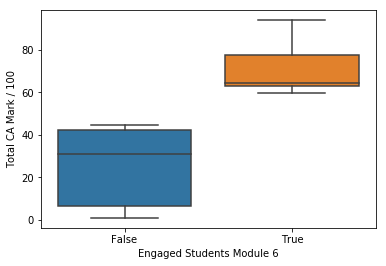

In [67]:
sns.boxplot(x = 'Engaged Students Module 6', y = 'Total CA Mark / 100', data = m6og)

In [70]:
# Group Module Own Grades  by 'Pass' and compute the mean
print(m6og.groupby(['Engaged Students Module 6']).mean())


                              Group  Total CA Mark / 100  \
Engaged Students Module 6                                  
False                      1.384615            25.292308   
True                       1.600000            70.693778   

                           CA1 Theory Test / 35  CA2 Lab Test / 45  \
Engaged Students Module 6                                            
False                                 11.403846               5.85   
True                                  21.199333              33.45   

                           Labs CA / 20  Wk1-Lecture  Wk2-CA / 3  \
Engaged Students Module 6                                          
False                          7.884615     0.846154    1.461538   
True                          15.944444     1.000000    2.666667   

                           wk2-CA / 2.5  wk3-CA / 3  wk3-Ca/2.5   ...     \
Engaged Students Module 6                                         ...      
False                          1.217949    2.076923  

In [71]:
m6ml.head(2)

,Date,Time,User full name,Event context,Component,Event name
41,2019-01-21,22:03,afDK bEXb,File: Lecture 11 - b a Small N,File,Course module viewed
42,2019-01-21,22:03,afDK bEXb,File: Lecture 10 - t and a l,File,Course module viewed


In [72]:
module6ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4408 entries, 41 to 5504
Data columns (total 8 columns):
Time              4408 non-null object
User full name    4408 non-null object
Event context     4408 non-null object
Component         4408 non-null object
Event name        4408 non-null object
Date              4408 non-null datetime64[ns]
First name        4408 non-null object
Last name         4408 non-null object
dtypes: datetime64[ns](1), object(7)
memory usage: 309.9+ KB


In [73]:
module6mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
First name                          28 non-null object
Surname                             28 non-null object
ID number                           28 non-null object
Email address                       28 non-null object
Quiz: CA1 - Theory Test (Real)      28 non-null float64
Last downloaded from this course    28 non-null int64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ KB


In [97]:
module6ml_onehot.head(3)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Comment created,Event name_Course activity completion updated,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_Submission comments,Component_System,Component_URL,Component_User report
41,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
42,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
43,22:02,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [98]:
m6og_subset_tidy.head(2)

,ID number,First name,Surname,Group,Total CA Mark / 100,Final Grade,CA1 Theory Test / 35,CA2 Lab Test / 45,Labs CA / 20,Wk1-Lecture,...,Wk9-Lecture,Wk9-Lab,Wk9-CA / 3,wk10-Lecture,wk10-Lab,wk10-CA / 2.5,wk10-CA / 3,wl11-Lecture,wk11-CA2,wk0-CA / 2.5
0,Cg2xJ2Si,ag2x,bJ2S,1,42.306667,C,20.79,14.85,6.666667,1,...,Y,N,0,N,N,0.0,0,N,Y,0.000000
1,z2miDkoM,a2mi,bDko,2,84.453333,A,26.12,45.00,13.333333,1,...,Y,Y,2,N,Y,2.5,3,N,Y,1.666667


In [105]:
merge_subset6 = pd.merge(module6ml_onehot,m6og_subset_tidy[['First name','engaged']],on='First name', how='left')

In [106]:
merge_subset6.head(2)

,Time,User full name,Date,First name,Last name,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Comment created,Event name_Course activity completion updated,...,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_Submission comments,Component_System,Component_URL,Component_User report,engaged
0,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,22:03,afDK bEXb,2019-01-21,afDK,bEXb,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [107]:
X6s = merge_subset6.iloc[:,5:86]  #independent columns
y6s = merge_subset6.iloc[:,-1]    #target column i.e engaged

In [108]:
X6s.head(2)

,Event name_A file has been uploaded.,Event name_A submission has been submitted.,Event name_Badge listing viewed,Event name_Comment created,Event name_Course activity completion updated,Event name_Course module instance list viewed,Event name_Course module viewed,Event name_Course user report viewed,Event name_Course viewed,Event name_Discussion viewed,...,Component_Assignment,Component_File,Component_File submissions,Component_Forum,Component_Overview report,Component_Quiz,Component_Submission comments,Component_System,Component_URL,Component_User report
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
y6s.head(2)

0    1
1    1
Name: engaged, dtype: int64

In [110]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X6s,y6s)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X6s.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


                                              Specs      Score
59              Event context_File: Lecture 9 - SIN  14.716219
42       Event context_File: Lab 6 Part 1 - C (PTF)  13.169865
38      Event context_File: Lab 4 Part 2 - Cn a WWL  11.053116
46  Event context_File: Lab 8 - D and I a SN v A Sc   9.794720
7              Event name_Course user report viewed   9.357681
28         Event context_Assignment: Lab 6 - UPLOAD   8.579323
57        Event context_File: Lecture 7 - R and v A   6.155156
69     Event context_URL: l to Download PT (from N)   5.736465
25                      Event name_User list viewed   5.310968
33         Event context_File: Lab 2 - b a Simple N   5.196552


[  4.17225533e-03   6.51210627e-04   1.86536932e-03   9.88667528e-04
   5.91196448e-03   2.00019252e-02   6.57920224e-03   7.28799068e-02
   8.52624400e-03   1.50207486e-03   4.52573107e-03   8.87629237e-03
   1.56280075e-02   1.05132481e-03   1.00895197e-03   1.12896737e-03
   1.00467914e-02   2.48200955e-03   4.44939580e-03   3.64053394e-03
   6.72318937e-03   2.05015437e-02   1.42005458e-03   3.18908701e-03
   2.50054958e-03   2.30604990e-02   7.31818798e-03   7.43024721e-03
   3.77844141e-02   1.29570383e-02   1.95799842e-02   2.19885165e-03
   9.29152052e-03   2.94696583e-02   1.03467046e-02   4.19915409e-03
   4.54469788e-04   2.20233738e-03   7.15890005e-02   3.38461508e-04
   2.69202863e-02   1.32695134e-02   8.41305692e-02   5.34574274e-04
   1.29514622e-02   9.51254794e-03   5.96891237e-02   6.71637382e-03
   1.35171211e-02   8.11025042e-03   5.49967247e-03   1.18010701e-03
   7.78528289e-03   2.37239334e-02   1.95425695e-02   6.40366151e-04
   1.08044484e-02   3.49821534e-02

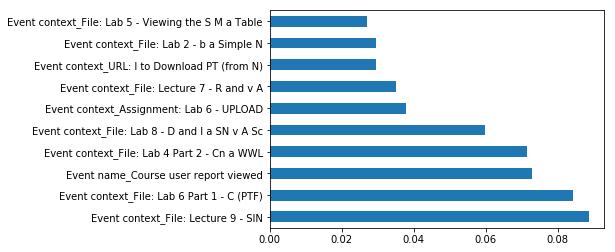

In [111]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X6s,y6s)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X6s.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


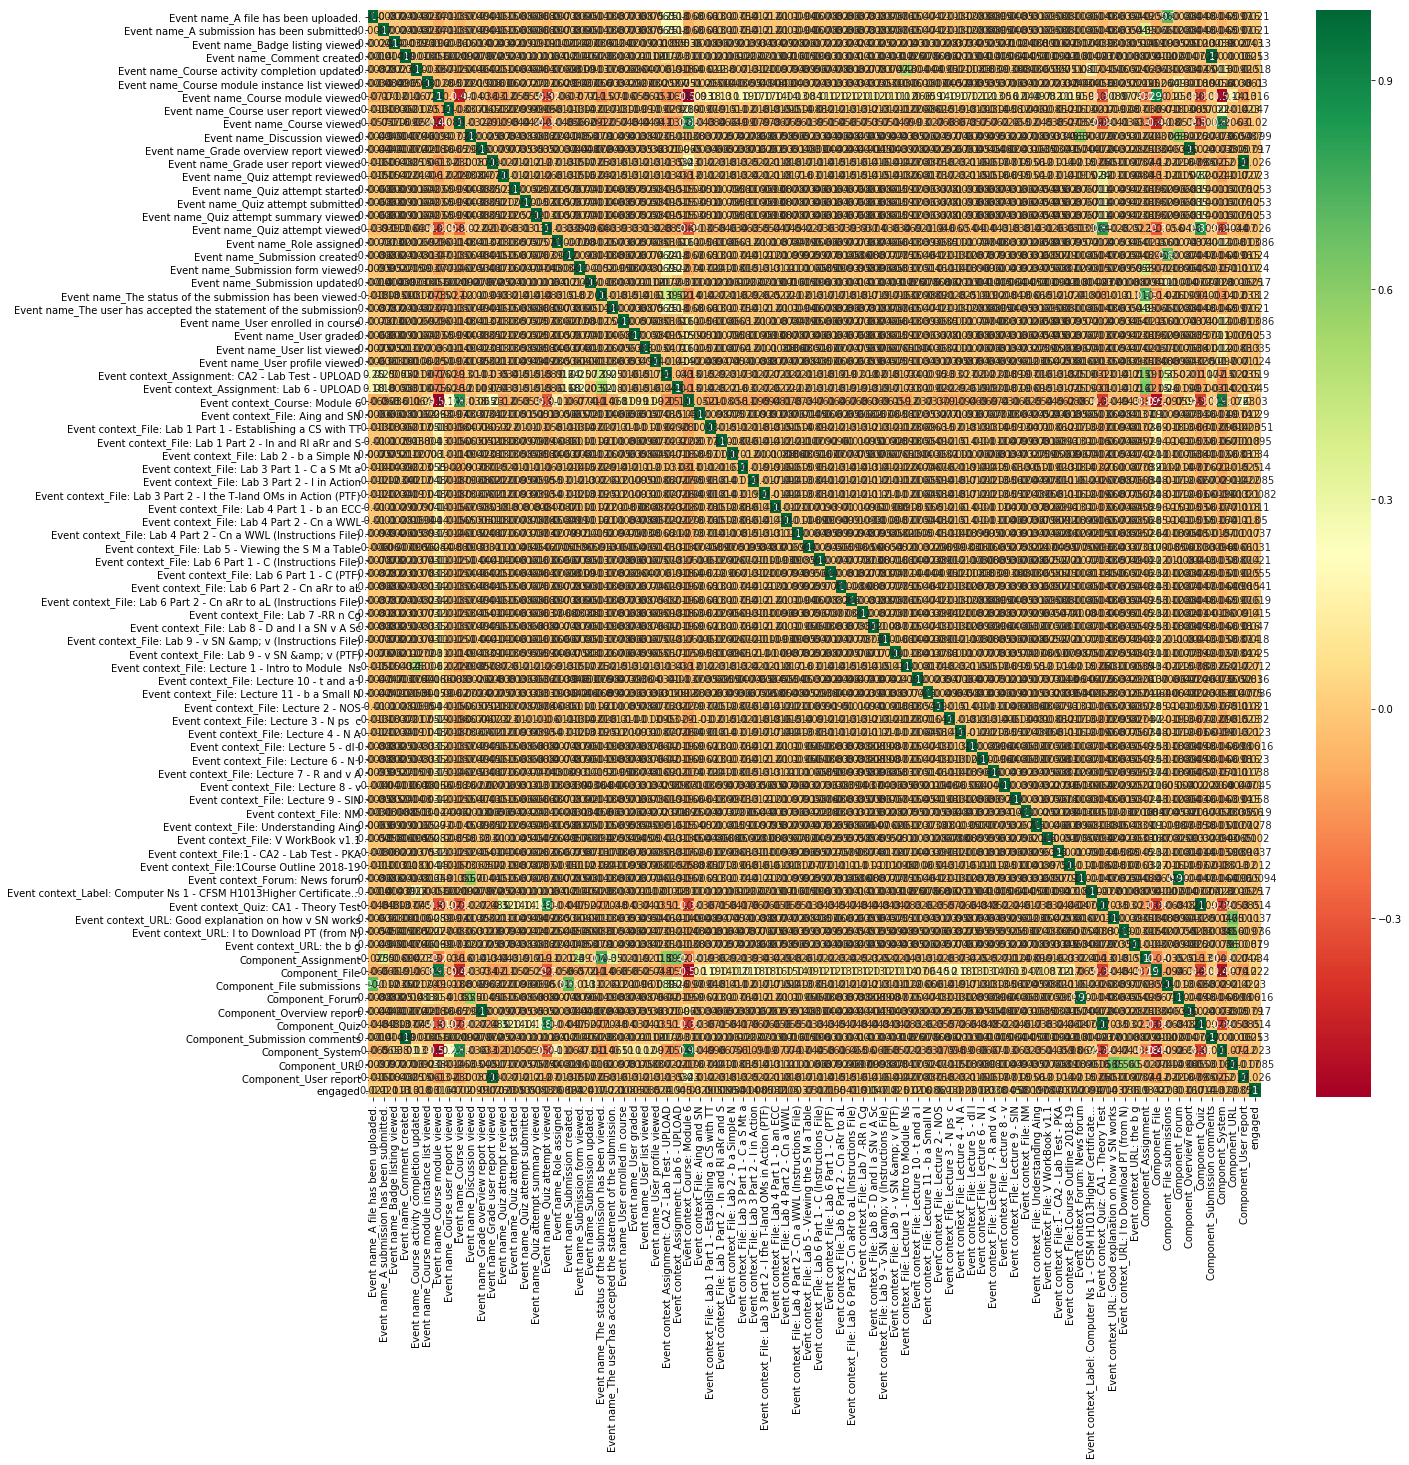

In [112]:
#get correlations of each features in dataset
corrmat = merge_subset6.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merge_subset6[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [113]:
X6s.columns

Index(['Event name_A file has been uploaded.',
       'Event name_A submission has been submitted.',
       'Event name_Badge listing viewed', 'Event name_Comment created',
       'Event name_Course activity completion updated',
       'Event name_Course module instance list viewed',
       'Event name_Course module viewed',
       'Event name_Course user report viewed', 'Event name_Course viewed',
       'Event name_Discussion viewed',
       'Event name_Grade overview report viewed',
       'Event name_Grade user report viewed',
       'Event name_Quiz attempt reviewed', 'Event name_Quiz attempt started',
       'Event name_Quiz attempt submitted',
       'Event name_Quiz attempt summary viewed',
       'Event name_Quiz attempt viewed', 'Event name_Role assigned',
       'Event name_Submission created.', 'Event name_Submission form viewed.',
       'Event name_Submission updated.',
       'Event name_The status of the submission has been viewed.',
       'Event name_The user has acce

In [114]:
featselect6 = X6s[['Event context_File: Lecture 9 - SIN','Event context_File: Lab 6 Part 1 - C (PTF)','Event context_File: Lab 4 Part 2 - Cn a WWL','Event context_File: Lab 8 - D and I a SN v A Sc','Event name_Course user report viewed','Event context_Assignment: Lab 6 - UPLOAD','Event context_File: Lecture 7 - R and v A','Event context_URL: l to Download PT (from N)','Event name_User list viewed','Event context_File: Lab 2 - b a Simple N']]

In [115]:
# 59              Event context_File: Lecture 9 - SIN  14.716219
#42       Event context_File: Lab 6 Part 1 - C (PTF)  13.169865
#38      Event context_File: Lab 4 Part 2 - Cn a WWL  11.053116
#46  Event context_File: Lab 8 - D and I a SN v A Sc   9.794720
#7              Event name_Course user report viewed   9.357681
#28         Event context_Assignment: Lab 6 - UPLOAD   8.579323
#57        Event context_File: Lecture 7 - R and v A   6.155156
#69     Event context_URL: l to Download PT (from N)   5.736465
#25                      Event name_User list viewed   5.310968
#33         Event context_File: Lab 2 - b a Simple N   5.196552
#
#

In [116]:
Xfs6 = featselect6 # Features
yfs6 = y6s # Target variable


In [117]:
# Split dataset into training set and test set
Xfs6_train, Xfs6_test, yfs6_train, yfs6_test = train_test_split(Xfs6, yfs6, test_size=0.3, random_state=1) # 70% training and 30% test


In [118]:
# Create Decision Tree classifer object
dtclffs6 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtclffs6 = dtclffs6.fit(Xfs6_train,yfs6_train)

#Predict the response for test dataset
yfs6_pred = dtclffs6.predict(Xfs6_test)


In [125]:
cvscores_10dt = cross_val_score(dtclffs6, Xfs6_train, yfs6_train, cv = 10)
print(np.mean(cvscores_10dt))

0.585108320013


In [126]:
# Instantiate the classifier
rfclffs6 = RandomForestClassifier()

# Fit to the training data
rfclffs6.fit(Xfs6_train, yfs6_train)

# Compute accuracy
print(rfclffs6.score(Xfs6_test, yfs6_test))


0.578987150416


In [127]:
cvscores_10rf = cross_val_score(rfclffs6, Xfs6_train, yfs6_train, cv = 10)
print(np.mean(cvscores_10rf))

0.585108320013


In [128]:
from sklearn.svm import SVC

svcfs6 = SVC()

#Train it, or "fit it", to the data:
svcfs6.fit(Xfs6_train, yfs6_train)

# Compute accuracy
print(svcfs6.score(Xfs6_test, yfs6_test))


0.578987150416


In [129]:
cvscores_10svc = cross_val_score(svcfs6, Xfs6_train, yfs6_train, cv = 10)
print(np.mean(cvscores_10svc))

0.579590934173


In [130]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logregfs6 = LogisticRegression()

# fit the model with data
logregfs6.fit(Xfs6_train,yfs6_train)

#
ylg6_pred=logregfs6.predict(Xfs6_test)


In [131]:
cvscores_10 = cross_val_score(logregfs6, Xfs6_train, yfs6_train, cv = 10)
print(np.mean(cvscores_10))

0.585108320013


In [119]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yfs6_test, yfs6_pred))


Accuracy: 0.578987150416


In [120]:
# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(yfs6_test, yfs6_pred))


0.57554517134


In [121]:
# Import recall_score - Really high recall
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(yfs6_test, yfs6_pred))


0.984021304927


In [122]:
print("Accuracy:",metrics.accuracy_score(yfs6_test, yfs6_pred))
print("Precision:",metrics.precision_score(yfs6_test, yfs6_pred))
print("Recall:",metrics.recall_score(yfs6_test, yfs6_pred))
print("F1 Score",metrics.f1_score(yfs6_test, yfs6_pred))


Accuracy: 0.578987150416
Precision: 0.57554517134
Recall: 0.984021304927
F1 Score 0.72628992629


In [123]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(yfs6_test, yfs6_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(yfs6_test, yfs6_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yfs6_test, yfs6_pred)))

Mean Absolute Error: 0.421012849584
Mean Squared Error: 0.421012849584
Root Mean Squared Error: 0.648855029713


In [124]:
#
#
# EndofFS

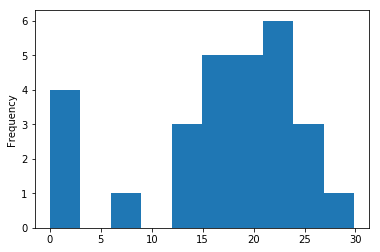

In [74]:
m6mg_subset['Quiz: CA1 - Theory Test (Real)'].plot('hist')

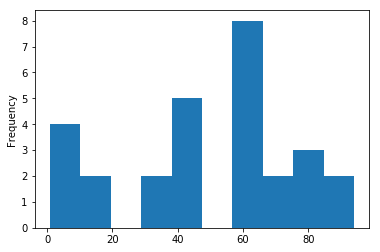

In [75]:
m6og['Total CA Mark / 100'].plot('hist')

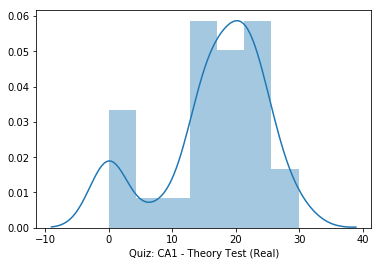

In [76]:
sns.distplot(m6mg['Quiz: CA1 - Theory Test (Real)'])